### Data Cleaning & Preprocessing
Since I already performed EDA in Rmarkdown, in this jupyter notebook I will proceed to training models.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
df = pd.read_csv("Telco_churn.csv")

In [3]:
df.info()
df.head(5)
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
#Imputing missing data with 0
df.TotalCharges.fillna(0, inplace = True) 

In [5]:
#Examine data values
for item in df.columns:
    print(item)
    print(df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [6]:
#Convert predictor value to a binary value
convert_columns = ['Churn', 
                  'Partner',
                  'Dependents',
                  'PhoneService',
                  'PaperlessBilling']
for item in convert_columns:
    df[item].replace(to_replace = "Yes", value = 1, inplace = True)
    df[item].replace(to_replace = "No", value = 0, inplace = True)

In [7]:
#Removing CustomerID
df = df.iloc[:, 1:]

In [8]:
df = pd.get_dummies(df)

### Fitting models
In this section, I will fit different models to predict customer churn, as well as practice parameter tuning. 

In [9]:
#Defining predictor and response variables
labels = np.array(df['Churn'])
features = df.drop('Churn', axis = 1)
features_name = list(features.columns)
features = np.array(features)

In [11]:
#Split data to training and testing
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 37)

In [12]:
#Checking dataset sizes
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (5282, 41)
Training Labels Shape: (5282,)
Testing Features Shape: (1761, 41)
Testing Labels Shape: (1761,)


In [13]:
#Train a random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(train_features, train_labels);

In [14]:
prediction_rf = rf.predict(test_features)

In [17]:
#Confusion Matrix & accuracy rate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(test_labels, prediction_rf))
print('Accuracy Rate:', accuracy_score(test_labels, prediction_rf))

[[1129  136]
 [ 238  258]]
Accuracy Rate: 0.7876206700738216


In [18]:
#10-fold cross validation
from sklearn.model_selection import cross_val_score
clf_score = cross_val_score(rf, features, labels, cv = 10)
print(clf_score)
clf_score.mean()

[0.79716312 0.81134752 0.79716312 0.79574468 0.77840909 0.75710227
 0.82244318 0.79971591 0.79971591 0.80512091]


0.7963925713736744

A 10-fold cross validation returns an accuracy rate of 80% from my default random forest model. 

### Tuning Parameter with GridSearch

In [19]:
#Take a look at our currently used parameters
from pprint import pprint 
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


According to the documentation of random forest in sk-learn, the most important hyperparameters are **n_estimators**,
the number of trees in the forest, and **max_features**, the maximum number considered for splitting a node. To experiment, I will play with these hyperparameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(100, 1000, num = 20)]
max_features = ['auto', 'sqrt']

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features}
pprint(random_grid)

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, random_state = 42)
rf_random.fit(features, labels)

In [ ]:
rf_random.best_params_

In [ ]:
best_random = rf_random.best_estimator_
clf_score_random = cross_val_score(best_random, features, labels, cv = 10)
print(clf_score_random)
clf_score_random.mean() #Has not improved in 10-fold CV after all the computation! 

In [ ]:
pprint(best_random.get_params())

In [ ]:
#Feature Importance
importance = list(best_random.feature_importances_)

In [ ]:
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(features_name, importance)]
feature_importance = sorted(feature_importance, key = lambda x:x[1], reverse = True)

In [ ]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

### Gradient Boosting 

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel = GradientBoostingClassifier(learning_rate = 0.1)
gbmodel.fit(train_features, train_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

[0.01234213 0.00124805 0.01072322 0.11129211 0.         0.02967328
 0.21888183 0.32550948 0.0147246  0.0024432  0.01791984 0.00209819
 0.00249049 0.00136508 0.01792778 0.         0.02445155 0.
 0.         0.0139467  0.00048628 0.00230509 0.00132656 0.
 0.00320143 0.03271765 0.         0.00856421 0.00087981 0.
 0.00867851 0.         0.         0.00528188 0.06917366 0.00366355
 0.01216164 0.00357861 0.00841616 0.02609753 0.00642991]


<Container object of 41 artists>

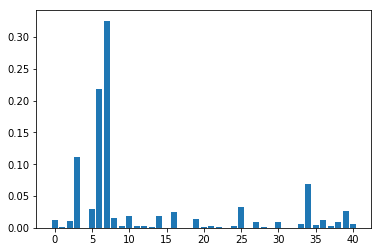

In [26]:
print(gbmodel.feature_importances_)
pyplot.bar(range(len(gbmodel.feature_importances_)), gbmodel.feature_importances_)

In [27]:
feature_importance_gb = pd.DataFrame({'variable': features_name, 
                                      'importance': gbmodel.feature_importances_})
feature_importance_gb = feature_importance_gb[['variable', 'importance']]
feature_importance_gb = feature_importance_gb.sort_values('importance', ascending = False).reset_index()
feature_importance_gb.drop(columns = 'index', inplace = True)
feature_importance_gb

,variable,importance
0,TotalCharges,0.325509
1,MonthlyCharges,0.218882
2,tenure,0.111292
3,Contract_Month-to-month,0.069174
4,TechSupport_No,0.032718
5,PaperlessBilling,0.029673
6,PaymentMethod_Electronic check,0.026098
7,OnlineSecurity_No,0.024452
8,InternetService_Fiber optic,0.017928
9,MultipleLines_No,0.017920


In [29]:
#Predicting
gb_test = gbmodel.predict(test_features)

In [34]:
print(confusion_matrix(test_labels, gb_test))
print((1152 + 258) / len(test_features))
print(accuracy_score(test_labels, gb_test)) #same as manual calculation 

[[1152  113]
 [ 238  258]]
0.8006814310051107
0.8006814310051107


In [35]:
#Evaluating with precision score
from sklearn.metrics import average_precision_score
print(average_precision_score(test_labels, gb_test))

0.496879897513788
